In [62]:
import pandas as pd


file_path = "C:\\Users\\abubabu\\Documents\\GitHub\\synthetic-population-simulation\\NHTS Data Parser\\HH Data Parser\\trippub.csv"
# df = pd.read_csv(file_path)

columns_to_keep = ['DWELTIME','HOUSEID', 'PERSONID',"STRTTIME","ENDTIME",'TRVLCMIN', 'R_SEX', 'WRKCOUNT','HHVEHCNT', 'HHSIZE','EDUC','WHYTRP1S','HHFAMINC']
final_data = pd.read_csv(file_path,usecols=columns_to_keep)




In [63]:
def translateAge(age):
    if age <=5:
        return 1
    elif age <= 18:
        return 2
    elif age <= 25:
        return 3
    elif age < 60:
        return 4
    else:
        return 5

# get the symbolic name of the gender from numerical value
def translateSex(sex):
    if sex == 1:
        return 'male'
    else:
        return 'female'

# get the race categories from numerical race values
def translateRace(race):
    if race == 1:
        return 1 #white
    elif race == 2:
        return 2 #black
    elif race == 4 and race ==6:
        return 3 #native
    elif race == 3:
        return 6 #asian
    elif race == 5:
        return 7 #'pacific-islander'
    else:
        return 8 #'other'
    
def translateInc(inc):
    if inc>=10: return 10
    if inc<1: return 0
    return inc   

def translateTSum(ts):
    if ts==1: return 1 #Home
    elif ts==10: return 2 #work
    elif ts==20: return 3 #school
    elif ts==30: return 4 #medical
    elif ts==40: return 5 #shopping
    elif ts==50: return 6 #social
    elif ts==70: return 7 #transport
    elif ts==80: return 8 #meals
    elif ts==97: return 9 #other
    else : return 0

In [64]:
import datetime
# final_data['R_AGE'] = final_data.apply(lambda row: translateAge(row['R_AGE']), axis=1)
# final_data['R_RACE'] = final_data.apply(lambda row: translateRace(row['R_RACE']), axis=1)
final_data['HHFAMINC'] = final_data.apply(lambda row: translateInc(row['HHFAMINC']), axis=1)
final_data['WHYTRP1S'] = final_data.apply(lambda row: translateTSum(row['WHYTRP1S']), axis=1)
# final_data['STRTTIME'] = final_data['STRTTIME'].apply(lambda x: datetime.time(hour=x // 100, minute=x % 100))
# final_data['ENDTIME'] = final_data['ENDTIME'].apply(lambda x: datetime.time(hour=x // 100, minute=x % 100))
# final_data['TRVLCMIN'] = final_data['TRVLCMIN'].apply(lambda x: datetime.time(hour=x // 100, minute=x % 100))

#KORLAM ABAR

In [65]:
final_data['STRTTIME'].value_counts()

STRTTIME
1700    17077
1600    15211
1500    14534
1000    14212
1100    13626
        ...  
439         1
226         1
221         1
346         1
341         1
Name: count, Length: 1397, dtype: int64

In [66]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf

X = final_data.drop(columns=['WHYTRP1S','HOUSEID', 'PERSONID'],axis=1)
# X = final_data.drop(columns=['WHYTRP1S','HOUSEID', 'PERSONID','STRTTIME','ENDTIME','TRVLCMIN'],axis=1)
y = final_data['WHYTRP1S']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print(X_train_scaled.shape)
print(y_train.shape)
print(X.shape)
num_classes =10
# y_train = tf.keras.utils.to_categorical(y_train, num_classes)
# y_test = tf.keras.utils.to_categorical(y_test, num_classes)


(738857, 10)
(738857,)
(923572, 10)


In [67]:
X_train_scaled

array([[-1.11390705, -1.07630199, -0.50266214, ...,  0.78242627,
        -0.6809178 ,  0.85813544],
       [ 0.74398245,  0.68145211, -0.50266214, ..., -1.30443073,
         0.54369188,  0.85813544],
       [-0.30897759, -0.35594918, -0.35093417, ..., -0.26100223,
        -2.51783233,  0.85813544],
       ...,
       [-1.4789332 , -1.53322481, -0.50266214, ...,  0.78242627,
        -0.6809178 ,  0.85813544],
       [ 1.66824738,  1.60229146, -0.50266214, ...,  0.78242627,
         1.15599672, -0.94759634],
       [ 1.7969425 ,  1.75382199, -0.1992062 , ...,  1.82585476,
         0.54369188,  0.85813544]])

In [68]:
# Create the neural network model
y_train_oh = tf.keras.utils.to_categorical(y_train, num_classes)
y_test_oh = tf.keras.utils.to_categorical(y_test, num_classes)
model = Sequential()
model.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train_scaled, y_train_oh, epochs=5, batch_size=32, validation_data=(X_test_scaled, y_test_oh))
# model.fit(X_train, y, epochs=3, batch_size=32, validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(X_test_scaled, y_test_oh)
print("Test loss:", loss)
print("Test accuracy:", accuracy)

Epoch 1/5
23090/23090 [==============================] - 20s 829us/step - loss: 1.2244 - accuracy: 0.5763 - val_loss: 1.1651 - val_accuracy: 0.5940
Epoch 2/5
23090/23090 [==============================] - 17s 749us/step - loss: 1.1690 - accuracy: 0.5960 - val_loss: 1.1665 - val_accuracy: 0.5967
Epoch 3/5
23090/23090 [==============================] - 17s 749us/step - loss: 1.1630 - accuracy: 0.5981 - val_loss: 1.1545 - val_accuracy: 0.6009
Epoch 4/5
23090/23090 [==============================] - 17s 751us/step - loss: 1.1598 - accuracy: 0.5993 - val_loss: 1.1536 - val_accuracy: 0.6024
Epoch 5/5
5773/5773 [==============================] - 3s 555us/step - loss: 1.1481 - accuracy: 0.6026
Test loss: 1.148098111152649
Test accuracy: 0.6026473045349121


In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
# Create a DecisionTreeClassifier
clf = DecisionTreeClassifier()

# Fit the model on the training data
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 37.06%


In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Create a RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model on the training data
rf_clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_clf.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 27.71%


doing Logistic Regression


c:\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression 0.3423598516633733
doing Gradient Boosting
Gradient Boosting 0.4618303873534905
doing AdaBoost
AdaBoost 0.44655279755298705
doing Random Forest
Random Forest 0.4674660964188074
doing Naive Bayes
Naive Bayes 0.3968816825921013
doing Decision Tree
Decision Tree 0.38398614081152044


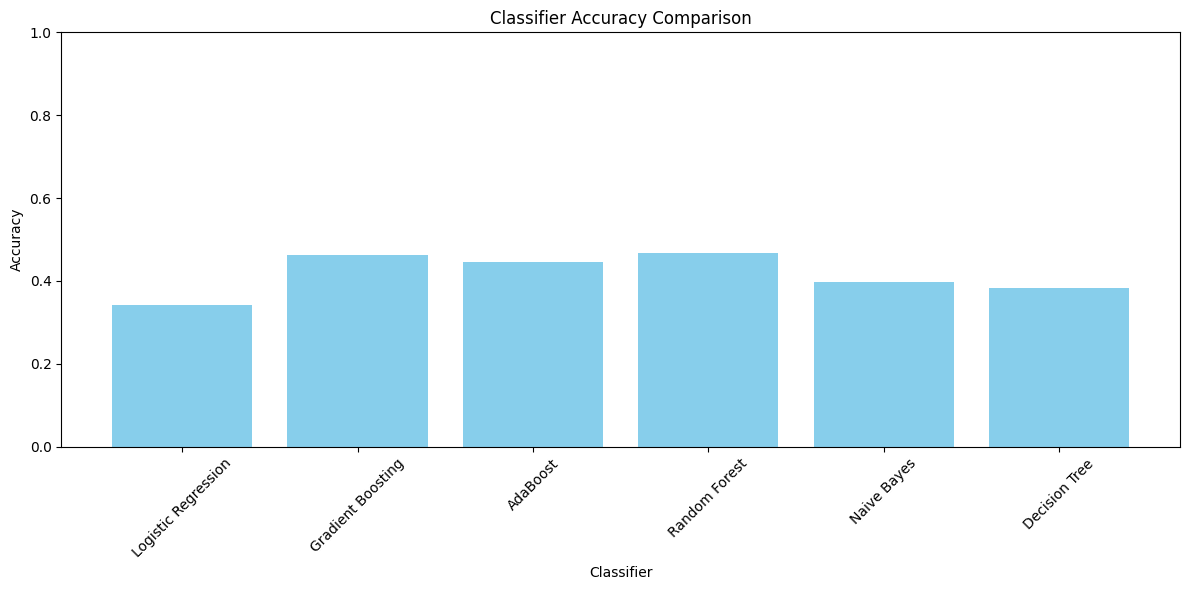

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Initialize classifiers
classifiers = {
    # 'SVM': SVC(),
    # 'KNN': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(),
}
y_train_oh = tf.keras.utils.to_categorical(y_train, num_classes)
y_test_oh = tf.keras.utils.to_categorical(y_test, num_classes)
# Train and evaluate each classifier
accuracies = {}
for clf_name, clf in classifiers.items():
    print('doing',clf_name)
    # if clf_name in ['Logistic Regression', 'SVM','Gradient Boosting']:
        # For Logistic Regression and SVM, we use y_train and y_test without one-hot encoding
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies[clf_name] = accuracy
    # else:
       
    #     # For other classifiers, we use y_train and y_test with one-hot encoding
    #     clf.fit(X_train, y_train_oh)
    #     y_pred = clf.predict(X_test)
    #     y_pred = np.argmax(y_pred, axis=1)  # Convert one-hot encoded predictions back to 1D array

    #     accuracy = accuracy_score(y_test_oh, y_pred)
    #     accuracies[clf_name] = accuracy
    print(clf_name,accuracy)

# Plot the accuracies in a graph



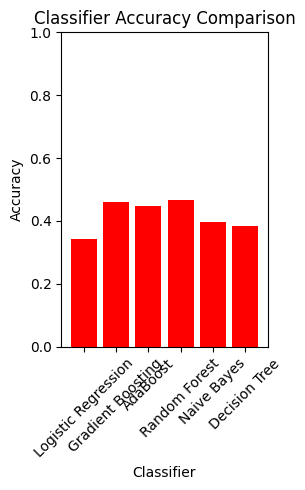

In [16]:
plt.figure(figsize=(3, 5))
plt.bar(accuracies.keys(), accuracies.values(), color='red')
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.title('Classifier Accuracy Comparison')
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

In [109]:
model.save("C:\\Users\\abubabu\\Documents\\GitHub\\synthetic-population-simulation\\Model\\v4_cp.h5")

In [110]:
data_to_predict=pd.read_csv("C:\\Users\\abubabu\\Documents\\GitHub\\synthetic-population-simulation\Model\\shundordata.csv")
data_to_predict=data_to_predict.drop(['Unnamed: 0'],axis=1)
# data_to_predict=data_to_predict.drop(['Unnamed: 0','STRTTIME','ENDTIME','TRVLCMIN'],axis=1)
data_to_predict.head(5)

,STRTTIME,ENDTIME,TRVLCMIN,HHSIZE,HHVEHCNT,HHFAMINC,WRKCOUNT,R_AGE,EDUC,R_SEX
0,1000,1100,60,3,0.0,10,0.0,5,3,2
1,1000,1100,60,3,0.0,10,0.0,5,3,2
2,1000,1100,60,3,0.0,10,0.0,5,3,2
3,1000,1100,60,2,3.0,10,3.0,4,1,2
4,1000,1100,60,2,3.0,10,3.0,4,1,2


In [111]:
data_to_predict = scaler.transform(data_to_predict)
predictions = model.predict(data_to_predict)
predicted_classes = np.argmax(predictions, axis=1)

313/313 [==============================] - 0s 578us/step


In [112]:
import pickle
with open('C:\\Users\\abubabu\\Documents\\GitHub\\synthetic-population-simulation\\Activity assignment\\scaler_filename.pkl', 'wb') as file:
    pickle.dump(scaler, file)

In [82]:
# Specify the filename for the CSV file
filename = 'data.csv'

# Save the NumPy array to the CSV file
np.savetxt(filename, predictions, delimiter=',')

In [113]:
predicted_classes

array([6, 6, 6, ..., 0, 0, 0], dtype=int64)

In [97]:
filename = 'data.txt'
np.savetxt(filename, predicted_classes)

In [82]:
final_data['HHFAMINC'].value_counts()

6     160854
10    138405
7     132897
8     110961
5     100756
4      70939
9      64388
3      59997
2      30177
1      29858
0      24340
Name: HHFAMINC, dtype: int64